* import libraries and load dataset

In [ ]:
import numpy as np
import pandas as pd
c=pd.read_csv('/content/Credit Score Classification Dataset.csv')
c

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000.0,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000.0,Master's Degree,Married,2,Owned,High
2,35,Female,75000.0,Doctorate,Married,1,Owned,High
3,40,Male,125000.0,High School Diploma,Single,0,Owned,High
4,45,Female,100000.0,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
159,29,Female,27500.0,High School Diploma,Single,0,Rented,Low
160,34,Male,47500.0,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500.0,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500.0,Master's Degree,Single,0,Owned,High


* first 5 rows

In [ ]:
c.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000.0,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000.0,Master's Degree,Married,2,Owned,High
2,35,Female,75000.0,Doctorate,Married,1,Owned,High
3,40,Male,125000.0,High School Diploma,Single,0,Owned,High
4,45,Female,100000.0,Bachelor's Degree,Married,3,Owned,High


* last 5 rows

In [ ]:
c.tail()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
159,29,Female,27500.0,High School Diploma,Single,0,Rented,Low
160,34,Male,47500.0,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500.0,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500.0,Master's Degree,Single,0,Owned,High
163,49,Female,77500.0,Doctorate,Married,1,Owned,High


* to find column name

In [ ]:
c.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

* find the data is balanced or imbalanced

In [ ]:
c['Credit Score'].value_counts()

High       113
Average     36
Low         15
Name: Credit Score, dtype: int64

* to find missing values

In [ ]:
c.isna().sum()

Age                   0
Gender                6
Income                9
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

* to fill the missing values

In [ ]:
for i in c.columns:
  if c[i].dtype=='object':
    c[i]=c[i].fillna(c[i].mode()[0])
  else:
    c[i]=c[i].fillna(c[i].mean())

In [ ]:
c.isna().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

* convert categorical data into numerical values.

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
la=LabelEncoder()
for i in c.columns:
  if c[i].dtype=='object':
    c[i]=la.fit_transform(c[i])
c

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,0,50000.0,1,1,0,1,1
1,30,1,100000.0,4,0,2,0,1
2,35,0,75000.0,2,0,1,0,1
3,40,1,125000.0,3,1,0,0,1
4,45,0,100000.0,1,0,3,0,1
...,...,...,...,...,...,...,...,...
159,29,0,27500.0,3,1,0,1,2
160,34,1,47500.0,0,1,0,1,0
161,39,0,62500.0,1,0,2,0,1
162,44,1,87500.0,4,1,0,0,1


*  input label and output label

In [ ]:
x=c.iloc[:,:-1].values
y=c.iloc[:,-1].values
x

array([[2.50e+01, 0.00e+00, 5.00e+04, ..., 1.00e+00, 0.00e+00, 1.00e+00],
       [3.00e+01, 1.00e+00, 1.00e+05, ..., 0.00e+00, 2.00e+00, 0.00e+00],
       [3.50e+01, 0.00e+00, 7.50e+04, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       ...,
       [3.90e+01, 0.00e+00, 6.25e+04, ..., 0.00e+00, 2.00e+00, 0.00e+00],
       [4.40e+01, 1.00e+00, 8.75e+04, ..., 1.00e+00, 0.00e+00, 0.00e+00],
       [4.90e+01, 0.00e+00, 7.75e+04, ..., 0.00e+00, 1.00e+00, 0.00e+00]])

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1,
       1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1,
       1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1,
       1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2,
       0, 1, 1, 1, 1, 2, 0, 1, 1, 1])

* split data into train and test data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[4.50000000e+01, 0.00000000e+00, 1.15000000e+05, 1.00000000e+00,
        0.00000000e+00, 3.00000000e+00, 0.00000000e+00],
       [5.10000000e+01, 1.00000000e+00, 1.35000000e+05, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.50000000e+01, 0.00000000e+00, 1.10000000e+05, 1.00000000e+00,
        0.00000000e+00, 3.00000000e+00, 0.00000000e+00],
       [3.40000000e+01, 1.00000000e+00, 4.75000000e+04, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.60000000e+01, 0.00000000e+00, 4.00000000e+04, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.40000000e+01, 1.00000000e+00, 7.50000000e+04, 4.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.20000000e+01, 1.00000000e+00, 1.05000000e+05, 4.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.10000000e+01, 1.00000000e+00, 6.50000000e+04, 1.00000000e+00,
        1.00000000e+00, 0

* Normalization

In [ ]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[ 0.77593283, -1.01770049,  0.94515333, -0.73865505, -0.98260737,
         2.66391337, -0.66561098],
       [ 1.49704432,  0.98260737,  1.59465735, -0.73865505, -0.98260737,
        -0.69792564, -0.66561098],
       [ 0.77593283, -1.01770049,  0.78277732, -0.73865505, -0.98260737,
         2.66391337, -0.66561098],
       [-0.5461049 ,  0.98260737, -1.24692275, -1.45227095,  1.01770049,
        -0.69792564,  1.50237907],
       [-1.50758688, -1.01770049, -1.49048675, -1.45227095,  1.01770049,
        -0.69792564,  1.50237907],
       [ 0.65574758,  0.98260737, -0.35385472,  1.40219264,  1.01770049,
        -0.69792564, -0.66561098],
       [ 0.41537709,  0.98260737,  0.62040132,  1.40219264,  1.01770049,
        -0.69792564, -0.66561098],
       [-0.90666064,  0.98260737, -0.67860673, -0.73865505,  1.01770049,
        -0.69792564,  1.50237907],
       [ 0.29519184,  0.98260737,  0.78277732, -0.02503915,  1.01770049,
        -0.69792564, -0.66561098],
       [-1.38740164, -1.0177

In [ ]:
y_train

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 2, 1, 0,
       1, 0, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1])

**Model Creation**

* KNN
* Naive_bayes
* SVM

[[ 9  2  0]
 [ 2 30  0]
 [ 3  0  4]]
              precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.94      0.94      0.94        32
           2       1.00      0.57      0.73         7

    accuracy                           0.86        50
   macro avg       0.86      0.78      0.79        50
weighted avg       0.88      0.86      0.86        50

[[ 9  2  0]
 [ 1 31  0]
 [ 2  0  5]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.94      0.97      0.95        32
           2       1.00      0.71      0.83         7

    accuracy                           0.90        50
   macro avg       0.90      0.83      0.86        50
weighted avg       0.91      0.90      0.90        50

[[ 9  2  0]
 [ 1 31  0]
 [ 3  0  4]]
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        11
           1      

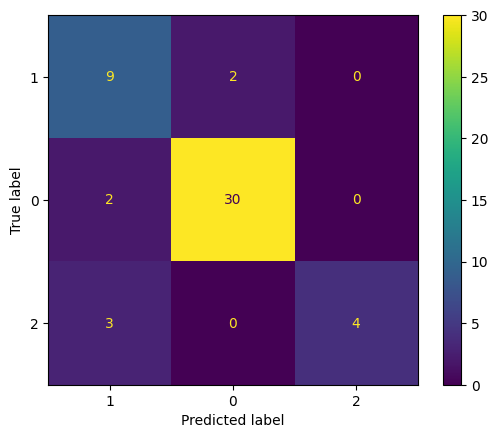

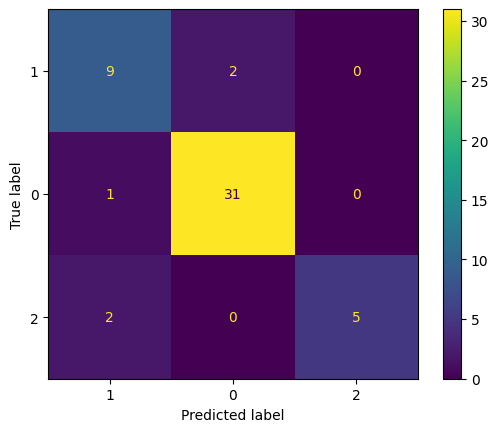

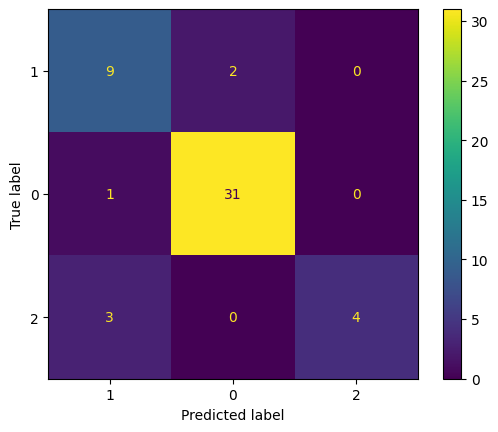

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
knn=KNeighborsClassifier(n_neighbors=7)
nb=BernoulliNB()
s=SVC()
lst=[knn,nb,s]

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
lab=[1,0,2]
for i in lst:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  mat=confusion_matrix(y_test,y_pred)
  cmd=ConfusionMatrixDisplay(mat,display_labels=lab)
  print(mat)
  print(classification_report(y_test,y_pred))
  cmd.plot()